In [3]:
#1 Python Configuration and Data Loading
import sys
if sys.version_info[0] < 3:
    raise Exception("Python 3 not detected.")
    
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm
from scipy import io
from sklearn.metrics import accuracy_score

for data_name in ["mnist", "spam", "cifar10"]:
    data = io.loadmat("data/%s_data.mat" % data_name)
    print("\nloaded %s data!" % data_name)
    fields = "test_data", "training_data", "training_labels"
    for field in fields:
        print(field, data[field].shape)


loaded mnist data!
test_data (10000, 784)
training_data (60000, 784)
training_labels (60000, 1)

loaded spam data!
test_data (5857, 32)
training_data (5172, 32)
training_labels (5172, 1)

loaded cifar10 data!
test_data (10000, 3072)
training_data (50000, 3072)
training_labels (50000, 1)


In [5]:
#2 Data Partitioning
#actual data for split
mnist_data = io.loadmat("data/mnist_data.mat")
spam_data = io.loadmat("data/spam_data.mat")
cifar10_data = io.loadmat("data/cifar10_data.mat")

#first shuffling
def shuffle(data):
    new_data = []
    for i in range(len(data['training_labels'])):
        elem = np.array((data['training_labels'][i], data['training_data'][i])) 
        new_data.append(elem)
    #for arr in data["training_data"]:
    np.random.shuffle(new_data)
    return new_data

np.random.seed(42)
mnist_data_shuff = shuffle(mnist_data)
spam_data_shuff = shuffle(spam_data)
cifar10_data_shuff = shuffle(cifar10_data)

#mnist 10000 as validation set of 60000
val_num_mnist = 10000
validation_mnist = mnist_data_shuff[0:val_num_mnist]
training_mnist = mnist_data_shuff[val_num_mnist:]
mnist_data['training_data'] =  [elem[1] for elem in training_mnist]
mnist_data['validation_data'] = [elem[1] for elem in validation_mnist]
mnist_data['training_labels'] = [elem[0] for elem in training_mnist]
mnist_data['validation_labels'] = [elem[0] for elem in validation_mnist]

#set aside 20% of the training data as a validation set
ratio = .2
val_num_spam = int(ratio*len(spam_data_shuff))
validation_spam = spam_data_shuff[0:val_num_spam]
training_spam = spam_data_shuff[val_num_spam:]
spam_data['training_dataMod'] = [elem[1] for elem in training_spam]
spam_data['validation_dataMod'] = [elem[1] for elem in validation_spam]
spam_data['training_labelsMod'] = [elem[0] for elem in training_spam]
spam_data['validation_labelsMod'] = [elem[0] for elem in validation_spam]

#set aside 5000 training images as a validation set
val_num_cifar10 = 5000
validation_cifar10 = cifar10_data_shuff[0:val_num_cifar10]
training_cifar10 = cifar10_data_shuff[val_num_cifar10:]
cifar10_data['training_data'] = [elem[1] for elem in training_cifar10]
cifar10_data['validation_data'] = [elem[1] for elem in validation_cifar10]
cifar10_data['training_labels'] = [elem[0] for elem in training_cifar10]
cifar10_data['validation_labels'] = [elem[0] for elem in validation_cifar10]

print('Mnist training data length: '+ str(len(mnist_data['training_data'])))
print('Mnist validation data length: '+ str(len(mnist_data['validation_data'])))
print('Mnist training labels length: '+ str(len(mnist_data['training_labels'])))
print('Mnist validation labels length: '+ str(len(mnist_data['validation_labels'])))
print('Spam training data length: '+ str(len(spam_data['training_dataMod'])))
print('Spam validation data length: '+ str(len(spam_data['validation_dataMod'])))
print('Spam training labels length: '+ str(len(spam_data['training_labelsMod'])))
print('Spam validation labels length: '+ str(len(spam_data['validation_labelsMod'])))
print('Cifar10 training data length: '+ str(len(cifar10_data['training_data'])))
print('Cifar10 validation data length: ' + str(len(cifar10_data['validation_data'])))
print('Cifar10 training labels length: '+ str(len(cifar10_data['training_labels'])))
print('Cifar10 validation labels length: '+ str(len(cifar10_data['validation_labels'])))

#len(mnist_data['validation_data'])

Mnist training data length: 50000
Mnist validation data length: 10000
Mnist training labels length: 50000
Mnist validation labels length: 10000
Spam training data length: 4138
Spam validation data length: 1034
Spam training labels length: 4138
Spam validation labels length: 1034
Cifar10 training data length: 45000
Cifar10 validation data length: 5000
Cifar10 training labels length: 45000
Cifar10 validation labels length: 5000


In [29]:
#simple test case for shuffle
dicti = {}
dicti['training_labels'] = np.array([[2],[1],[3]])
dicti['training_data'] = np.array([[2,4,3],[3,1,1],[6,8,5]])
pi = shuffle(dicti)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training error 100: 0.69646
Validation error 100: 0.6908


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training error 200: 0.81514
Validation error 200: 0.8101


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training error 500: 0.8658
Validation error 500: 0.8686


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training error 1000: 0.88408
Validation error 1000: 0.882


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training error 2000: 0.89828
Validation error 2000: 0.8967


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training error 5000: 0.9148
Validation error 5000: 0.9084


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training error 10000: 0.92634
Validation error 10000: 0.9092


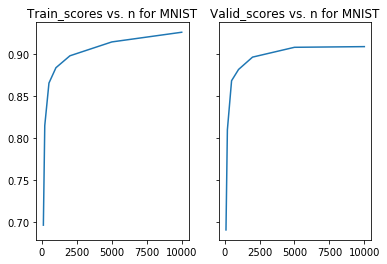

In [32]:
#3 Support Vector Machines: Coding
# a) MNIST dataset, train model with examples of 100,200,500,1000,2000,5000,10000
train_scores = []
valid_scores = []
n_list = [100,200,500,1000,2000,5000,10000]
for n in n_list:
    train_model = svm.SVC(kernel = 'linear')
    train_model.fit(mnist_data['training_data'][:n], mnist_data['training_labels'][:n])
    pred_train_labels = train_model.predict(mnist_data['training_data'])
    pred_valid_labels = train_model.predict(mnist_data['validation_data'])
    train_score = accuracy_score(mnist_data['training_labels'], pred_train_labels)
    valid_score = accuracy_score(mnist_data['validation_labels'], pred_valid_labels)
    print('Training error ' + str(n) + ': '+ str(train_score))
    print('Validation error ' + str(n) + ': ' + str(valid_score))
    train_scores.append(train_score)
    valid_scores.append(valid_score)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey = True)
ax1.plot(n_list, train_scores)
ax1.set_title('Train_scores vs. n for MNIST')
ax2.plot(n_list, valid_scores)
ax2.set_title('Valid_scores vs. n for MNIST');


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validati

Training error 100: 0.7796036732721121
Validation error 100: 0.7775628626692457
Training error 200: 0.7841952634122764
Validation error 200: 0.7862669245647969
Training error 500: 0.7950700821652973
Validation error 500: 0.7959381044487428
Training error 1000: 0.7979700338327694
Validation error 1000: 0.7959381044487428


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training error 2000: 0.8013533107781537
Validation error 2000: 0.7988394584139265


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training error 4138: 0.8011116481391977
Validation error 4138: 0.7978723404255319


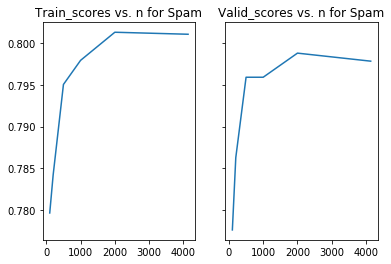

In [31]:
# b) spam dataset, use the provided frequencies as frequencies w/ training ex: 100,200,500,1000,2000,all
train_scores = []
valid_scores = []
n_list = [100, 200, 500, 1000, 2000, 4138]
for n in n_list:
    train_model = svm.SVC(kernel = 'linear')
    train_model.fit(spam_data['training_dataMod'][:n], spam_data['training_labelsMod'][:n])
    pred_train_labels = train_model.predict(spam_data['training_dataMod'])
    pred_valid_labels = train_model.predict(spam_data['validation_dataMod'])
    train_score = accuracy_score(spam_data['training_labelsMod'], pred_train_labels)
    valid_score = accuracy_score(spam_data['validation_labelsMod'], pred_valid_labels)
    print('Training error ' + str(n) + ': '+ str(train_score))
    print('Validation error ' + str(n) + ': ' + str(valid_score))
    train_scores.append(train_score)
    valid_scores.append(valid_score)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey = True)
ax1.plot(n_list, train_scores)
ax1.set_title('Train_scores vs. n for Spam')
ax2.plot(n_list, valid_scores)
ax2.set_title('Valid_scores vs. n for Spam');

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training error 100: 0.2164888888888889
Validation error 100: 0.2178


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training error 200: 0.2572888888888889
Validation error 200: 0.2484


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training error 500: 0.2836666666666667
Validation error 500: 0.2662


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training error 1000: 0.3138888888888889
Validation error 1000: 0.3002


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training error 2000: 0.32866666666666666
Validation error 2000: 0.2932


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training error 5000: 0.3735111111111111
Validation error 5000: 0.2968


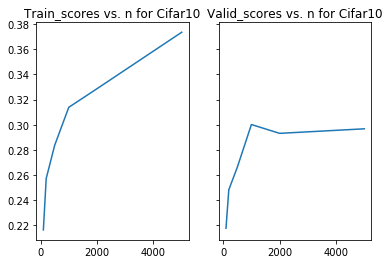

In [33]:
# c) cifar-10 dataset, use raw pixels as features w/ 100, 200, 500, 1000, 2000, 5000
train_scores = []
valid_scores = []
n_list = [100,200,500,1000,2000,5000]
for n in n_list:
    train_model = svm.SVC(kernel = 'linear')
    train_model.fit(cifar10_data['training_data'][:n], cifar10_data['training_labels'][:n])
    pred_train_labels = train_model.predict(cifar10_data['training_data'])
    pred_valid_labels = train_model.predict(cifar10_data['validation_data'])
    train_score = accuracy_score(cifar10_data['training_labels'], pred_train_labels)
    valid_score = accuracy_score(cifar10_data['validation_labels'], pred_valid_labels)
    print('Training error ' + str(n) + ': '+ str(train_score))
    print('Validation error ' + str(n) + ': ' + str(valid_score))
    train_scores.append(train_score)
    valid_scores.append(valid_score)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey = True)
ax1.plot(n_list, train_scores)
ax1.set_title('Train_scores vs. n for Cifar10')
ax2.plot(n_list, valid_scores)
ax2.set_title('Valid_scores vs. n for Cifar10');

In [ ]:
#4 Hyperparameter Tuning
# a) for the MNIST dataset, find the best C value. List the C values and train to up to 10000
#the non-extreme values showed no changed therefore testing more extremes
c_values = [.0000001,.000001,.00001,10000,100000, 1000000]
for c in c_values:
    train_model = svm.SVC(C = c, kernel = 'linear')
    train_model.fit(mnist_data['training_data'][:10000], mnist_data['training_labels'][:10000])
    pred_train_labels = train_model.predict(mnist_data['training_data'])
    pred_valid_labels = train_model.predict(mnist_data['validation_data'])
    train_score = accuracy_score(mnist_data['training_labels'], pred_train_labels)
    valid_score = accuracy_score(mnist_data['validation_labels'], pred_valid_labels)
    print('Training error w/ C =' + str(c) + ': '+ str(train_score))
    print('Validation error w/ C =' + str(c) + ': ' + str(valid_score))
    train_scores.append(train_score)
    valid_scores.append(valid_score)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# 5. K-Fold Cross Validation
# a) For the Spam Dataset use 5-fold Cross Validation to find and report the best C-values
#first shuffle and split the data
spam_shuffled = shuffle(spam_data)
split_data = np.array_split(spam_shuffled, 5)
c_values = [1000]
scores = []
for c in c_values:
    c_scores = []
    for i in range(5):
        validation_spam = split_data[i]
        training_spam = np.vstack((split_data[:i]+split_data[i+1:]))
        
        spam_data['training_dataCV'] = [elem[1] for elem in training_spam]
        spam_data['validation_dataCV'] = [elem[1] for elem in validation_spam]
        spam_data['training_labelsCV'] = [elem[0] for elem in training_spam]
        spam_data['validation_labelsCV'] = [elem[0] for elem in validation_spam]
        
        train_model = svm.SVC(C = c, kernel = 'linear')
        train_model.fit(spam_data['training_dataCV'], spam_data['training_labelsCV'])
        pred_valid_labels = train_model.predict(spam_data['validation_dataCV'])
        valid_score = accuracy_score(spam_data['validation_labelsCV'], pred_valid_labels)
        print(valid_score)
        c_scores.append(valid_score)
        
    c_score_avg = sum(c_scores)/5
    scores.append(sum(c_scores)/5)
    print('Cross-Validation w/ c= ' + str(c) + ':'  + str(c_score_avg))
        



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
#6 Kaggle 
train_model = svm.SVC(C = 10, kernel = 'linear')
train_model.fit(spam_data['training_dataMod'][:2000], spam_data['training_labelsMod'][:2000])
test_predictions_spam = train_model.predict(spam_data['test_data'])

def results_to_csv(y_test):
    y_test = y_test.astype(int)
    df = pd.DataFrame({'Category': y_test})
    df.index += 1  # Ensures that the index starts at 1. 
    df.to_csv('submission.csv', index_label='Id')


train_model = svm.SVC(C = .000001, kernel = 'linear')
train_model.fit(mnist_data['training_data'][:10000], mnist_data['training_labels'][:10000])
test_predictions_mnist = train_model.predict(mnist_data['test_data'])

train_model = svm.SVC(kernel = 'linear')
train_model.fit(cifar10_data['training_data'][:1000], cifar10_data['training_labels'][:1000])
test_predictions_cifar10 = train_model.predict(cifar10_data['test_data'])

results_to_csv(test_predictions_cifar10)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
